In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

In [11]:
df = pd.read_csv("./drug_consumption.txt",  sep=',')
df.columns= ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

coke= df["Coke"].to_numpy()
age= df["Age"].to_numpy()

cokeAge= np.column_stack((coke, age))
print(cokeAge)

[['CL3' -0.07854]
 ['CL0' 0.49788000000000004]
 ['CL2' -0.9519700000000001]
 ...
 ['CL4' -0.07854]
 ['CL0' -0.9519700000000001]
 ['CL3' -0.9519700000000001]]


In [12]:
age_cat= [-0.95197, -0.07854, 0.49788, 1.09449, 1.82213, 2.59171]
frequency= ['CL6', 'CL5', 'CL4', 'CL3', 'CL2', 'CL1', 'CL0']
age_cat_coke= np.zeros((len(frequency), len(age_cat)))

In [13]:
for i in range(len(frequency)):
    cokeFreq= cokeAge[:, 0]==frequency[i]
    for j in range(len(age_cat)):
        age_cat_clean= np.abs(cokeAge[:, 1] - age_cat[j]) < 0.1
        age_cat_coke[i, j]= np.sum(age_cat_clean & cokeFreq)
print(age_cat_coke)

print(np.sum(age_cat_coke[:1, :], axis= 0))

[[ 11.   5.   2.   0.   1.   0.]
 [ 26.  12.   2.   1.   0.   0.]
 [ 54.  29.  11.   4.   1.   0.]
 [135.  76.  30.  15.   2.   0.]
 [ 65. 102.  64.  29.  10.   0.]
 [  3.  20.  53.  61.  21.   2.]
 [349. 237. 193. 184.  58.  16.]]
[11.  5.  2.  0.  1.  0.]


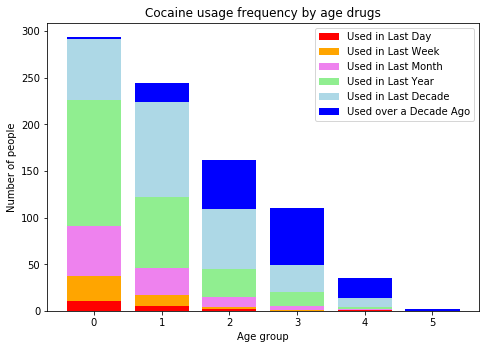

In [23]:
fig = plt.figure()
N= len(age_cat)
ind = np.arange(N)

width = 0.1

ax = fig.add_axes([0,0,1,1])
ax.bar(ind, age_cat_coke[0, :], bottom=0, color  = 'r')
ax.bar(ind, age_cat_coke[1, :], bottom=np.sum(age_cat_coke[:1, :], axis=0), color  = 'orange')
ax.bar(ind, age_cat_coke[2, :], bottom=np.sum(age_cat_coke[:2, :], axis=0), color  = 'violet')
ax.bar(ind, age_cat_coke[3, :], bottom=np.sum(age_cat_coke[:3, :], axis=0), color  = 'lightgreen')
ax.bar(ind, age_cat_coke[4, :], bottom=np.sum(age_cat_coke[:4, :], axis=0), color  = 'lightblue')
ax.bar(ind, age_cat_coke[5, :], bottom=np.sum(age_cat_coke[:5, :], axis=0), color  = 'blue')
# ax.bar(ind, age_cat_coke[6, :], bottom=np.sum(age_cat_coke[:6, :], axis=0), color  = 'white')
ax.set_xlabel('Age group')
ax.set_ylabel('Number of people')
ax.set_title('Cocaine usage frequency by age drugs')
ax.legend(labels=['Used in Last Day', 'Used in Last Week', 'Used in Last Month', 'Used in Last Year', 'Used in Last Decade', 'Used over a Decade Ago', 'Never Used'])
plt.show()

In [15]:
print(age_cat_coke[5, :])
print(np.sum(age_cat_coke[:5, :], axis=0))

[ 3. 20. 53. 61. 21.  2.]
[291. 224. 109.  49.  14.   0.]
